# Introduction

In [3]:
import pandas as pd
import numpy as np
import logging
import concurrent.futures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, balanced_accuracy_score, f1_score, confusion_matrix, balanced_accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectFromModel
import threading
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from joblib import dump, load


%matplotlib inline
np.random.seed(0)
random_state = 42
print_lock = threading.Lock()

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

## Reading data and EDA

In [4]:
# read cats and dogs data
X_cats_dogs = pd.read_csv('../data/CATSnDOGS.csv')
Y_cats_dogs = pd.read_csv('../data/CATSnDOGSlabels.csv')

Y_cats_dogs['x'].unique()

array([0, 1])

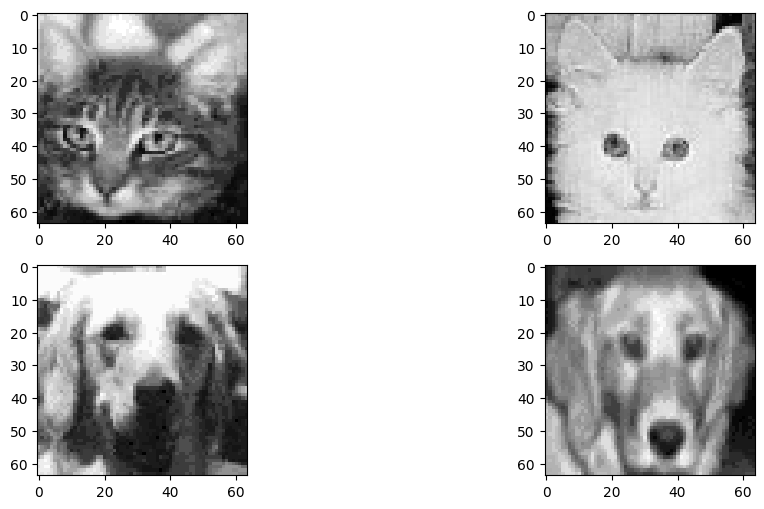

In [5]:
def rotateM(x):
    return np.transpose(np.apply_along_axis(np.flip, 0, x))

def plot_images(indices, data, category, cmap='gray'):
    for idx, i in enumerate(indices):
        plt.subplot(2, 2, idx + 1 + category * 2)
        plt.imshow(rotateM(data.iloc[i, :].values.reshape(64, 64)), cmap=cmap)
        plt.xlabel('')
        plt.ylabel('')

# random selections
ssc = np.random.choice(np.where(Y_cats_dogs == 0)[0], 2, replace=False)
ssd = np.random.choice(np.where(Y_cats_dogs == 1)[0], 2, replace=False)

plt.figure(figsize=(12, 6))
plot_images(ssc, X_cats_dogs, category=0)
plot_images(ssd, X_cats_dogs, category=1)
plt.show()

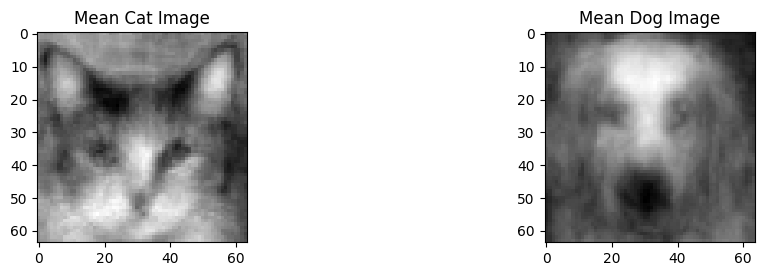

In [6]:
cat_indices = np.where(Y_cats_dogs == 0)[0]  # Indices of cats
dog_indices = np.where(Y_cats_dogs == 1)[0]  # Indices of dogs

mean_cat = np.mean(X_cats_dogs.iloc[cat_indices], axis=0)
mean_dog = np.mean(X_cats_dogs.iloc[dog_indices], axis=0)

mean_cat_image = rotateM(mean_cat.values.reshape(64, 64))
mean_dog_image = rotateM(mean_dog.values.reshape(64, 64))

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(mean_cat_image, cmap='gray')
plt.title('Mean Cat Image')
plt.subplot(2, 2, 2)
plt.imshow(mean_dog_image, cmap='gray')
plt.title('Mean Dog Image')
plt.show()

2024-05-07 19:18:19,076 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-07 19:18:19,082 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


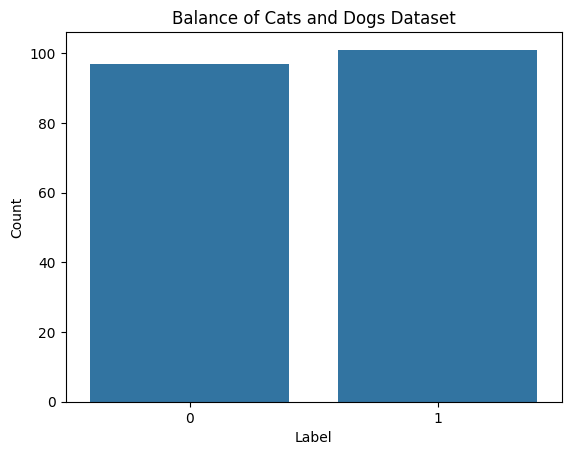

In [7]:
sns.countplot(data=Y_cats_dogs, x='x')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Balance of Cats and Dogs Dataset')
plt.show()